In [2]:
import os

# Set Kaggle configuration directory
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

# Rename the Kaggle API key file to the expected name
!mv '/content/kaggle (2).json' '/content/kaggle.json'

# Ensure the Kaggle API key has the correct permissions
!chmod 600 '/content/kaggle.json'

# Verify the changes
!ls '/content'


kaggle.json  sample_data


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [4]:
!kaggle datasets download -d preetviradiya/brian-tumor-dataset

 88% 94.0M/107M [00:00<00:00, 122MB/s]
100% 107M/107M [00:00<00:00, 129MB/s] 


In [5]:
!unzip \*.zip && rm *.zip

Archive:  brian-tumor-dataset.zip
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).png  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).tif  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (10).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (10).tif  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (100).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1000).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1001).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1002).JPG  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1003).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1004).jpg  
  inflating: Brain Tumo

In [42]:
import numpy as np
import pandas as pd

In [43]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

In [54]:
gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    zoom_range=(0.99, 0.99),
    dtype='float64'
)


In [45]:
df = pd.read_csv('metadata.csv')

In [46]:
df.head()

,Unnamed: 0,image,class,format,mode,shape
0,0,Cancer (1).jpg,tumor,JPEG,RGB,"(512, 512, 3)"
1,1,Cancer (1).png,tumor,PNG,L,"(300, 240)"
2,2,Cancer (1).tif,tumor,TIFF,RGB,"(256, 256, 3)"
3,3,Cancer (10).jpg,tumor,JPEG,RGB,"(512, 512, 3)"
4,4,Cancer (10).tif,tumor,TIFF,RGB,"(256, 256, 3)"


In [55]:
train = gen.flow_from_directory("/content/Brain Tumor Data Set/Brain Tumor Data Set",
                               target_size = (150,150),
                               batch_size = 256,
                               class_mode = "binary",
                               color_mode = "rgb",
                               shuffle = True,
                               seed = 123,
                               subset = "training")


Found 3681 images belonging to 2 classes.


In [56]:
val = gen.flow_from_directory("/content/Brain Tumor Data Set/Brain Tumor Data Set",
                               target_size = (150,150),
                               batch_size = 8,
                               class_mode = "binary",
                               color_mode = "rgb",
                               shuffle = True,
                               seed = 123,
                               subset = "validation")
classes = val.class_indices


Found 919 images belonging to 2 classes.


In [49]:
classes

{'Brain Tumor': 0, 'Healthy': 1}

In [57]:
import seaborn as sns

In [58]:
import tensorflow as tf



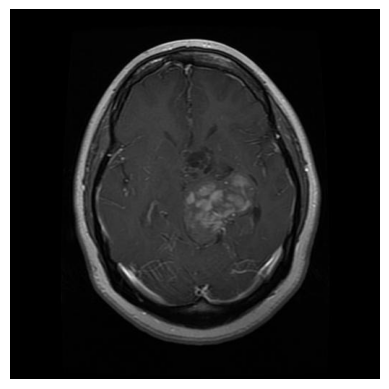

In [37]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Replace 'image_path' with the actual path to your image file
image_path = '/content/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).jpg'

# Load the image using matplotlib.image
img = mpimg.imread(image_path)

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()


In [52]:
from keras.layers import Conv2D, MaxPool2D, LeakyReLU, BatchNormalization, Dropout, Dense, InputLayer, Flatten
from keras.losses import BinaryCrossentropy
from keras.optimizers import Adam

<Axes: >

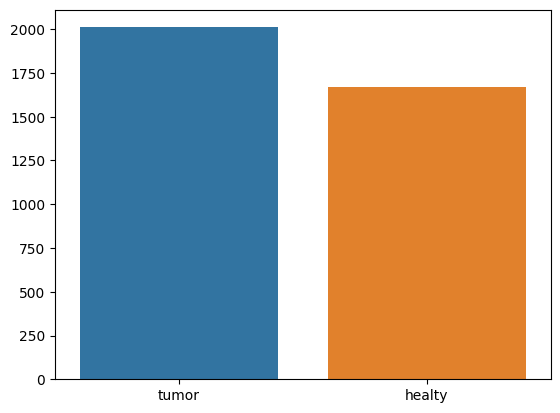

In [59]:
t=0
h=0
for i in range(15):
    a, b = next(train)
    for j in b:
        if j == 1:
            h+=1
        else:t+=1

sns.barplot(x=['tumor','healty'],y=[t,h])


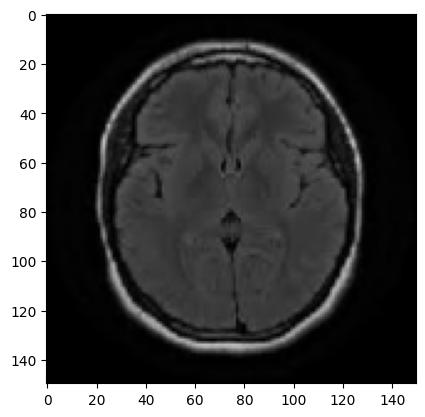

In [60]:
import matplotlib.pyplot as plt
batch = next(train)

plt.imshow(batch[0][0])

In [61]:
from keras.layers import Conv2D, MaxPool2D, LeakyReLU, BatchNormalization, Dropout, Dense, InputLayer, Flatten
from keras.losses import BinaryCrossentropy
from keras.optimizers import Adam

In [62]:
model = keras.Sequential()
model.add(InputLayer(input_shape=(150,150,3)))
model.add(Conv2D(filters=32,kernel_size=3, activation="relu", padding="same"))
model.add(MaxPool2D())
model.add(Conv2D(filters=64,kernel_size=3, activation="relu", padding="same"))
model.add(MaxPool2D())


model.add(Flatten())


model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))
model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))
model.add(Dense(1, activation="sigmoid"))


model.compile(optimizer=Adam(0.001),loss = BinaryCrossentropy(),metrics=['accuracy'])

In [63]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 87616)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [64]:
from keras import utils, callbacks
earlystopping = callbacks.EarlyStopping(monitor="val_loss", mode="min",
                                        patience=5, restore_best_weights = True)


In [66]:
history = model.fit(train,verbose=1,callbacks = [earlystopping],epochs=5,validation_data=(val))


Epoch 1/5
15/15 [==============================] - 31s 2s/step - loss: 0.3009 - accuracy: 0.8723 - val_loss: 0.3227 - val_accuracy: 0.8651
Epoch 2/5
15/15 [==============================] - 32s 2s/step - loss: 0.1834 - accuracy: 0.9381 - val_loss: 0.2482 - val_accuracy: 0.8977
Epoch 3/5
15/15 [==============================] - 32s 2s/step - loss: 0.1205 - accuracy: 0.9606 - val_loss: 0.2195 - val_accuracy: 0.9499
Epoch 4/5
15/15 [==============================] - 30s 2s/step - loss: 0.0795 - accuracy: 0.9794 - val_loss: 0.1876 - val_accuracy: 0.9674
Epoch 5/5
15/15 [==============================] - 30s 2s/step - loss: 0.0532 - accuracy: 0.9889 - val_loss: 0.1292 - val_accuracy: 0.9869


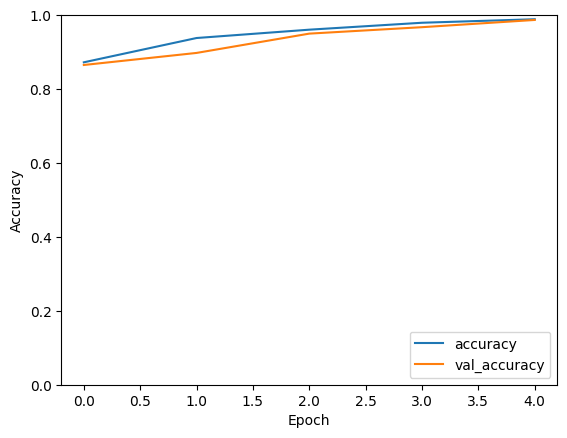

In [67]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

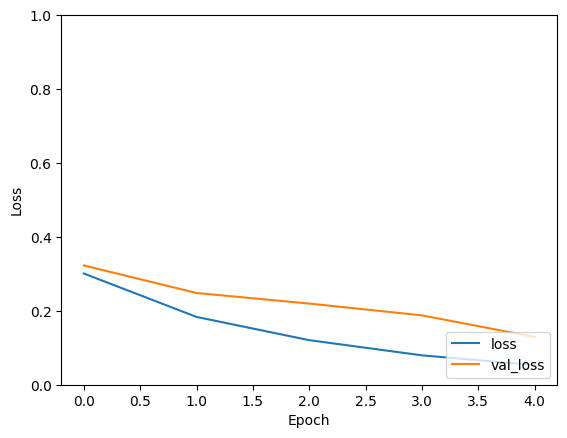

In [68]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [ ]:
#take epoch 20 as i took only 5 is not sufficent.

In [70]:
model.save('my_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
